In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten, Dropout, Lambda
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [5]:
x_train.shape

(60000, 784)

In [6]:
x_test.shape

(10000, 784)

In [7]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=10,
)

In [8]:
x_train.shape

(48000, 784)

In [9]:
x_validate.shape

(12000, 784)

In [10]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

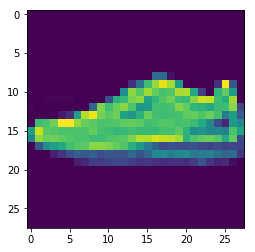

In [11]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [12]:
class_labels[int(y_train[50])]

'Sneaker'

CNN Model
- Define
- Compile
- Fit

In [13]:
batch_size = 512
im_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [14]:
# Model specifications

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

W0708 04:04:02.158647 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 04:04:02.553126 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 04:04:02.586345 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 04:04:02.657970 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0708 0

In [15]:
# compile model

opt = Adam(lr=0.001)
cnn_model.compile(loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

W0708 04:04:02.792918 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 04:04:02.797701 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
# training the model

cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 266us/step - loss: 0.8005 - acc: 0.7248 - val_loss: 0.4944 - val_acc: 0.8312
Epoch 2/10
48000/48000 [==============================] - 11s 227us/step - loss: 0.4557 - acc: 0.8399 - val_loss: 0.4097 - val_acc: 0.8568
Epoch 3/10
48000/48000 [==============================] - 11s 224us/step - loss: 0.4011 - acc: 0.8609 - val_loss: 0.3810 - val_acc: 0.8651
Epoch 4/10
48000/48000 [==============================] - 10s 213us/step - loss: 0.3734 - acc: 0.8701 - val_loss: 0.3773 - val_acc: 0.8663
Epoch 5/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.3542 - acc: 0.8761 - val_loss: 0.3389 - val_acc: 0.8813
Epoch 6/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.3370 - acc: 0.8831 - val_loss: 0.3268 - val_acc: 0.8867
Epoch 7/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.3202 - acc: 0.8884 - val_loss: 0.

In [17]:
# testing the model on test data

score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29223248200416563
Test accuracy: 0.8994


# A deeper CNN

In [18]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [19]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
cnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 37s 768us/step - loss: 0.7936 - acc: 0.7044 - val_loss: 0.4656 - val_acc: 0.8197
Epoch 2/10
48000/48000 [==============================] - 36s 744us/step - loss: 0.4636 - acc: 0.8290 - val_loss: 0.3855 - val_acc: 0.8592
Epoch 3/10
48000/48000 [==============================] - 34s 713us/step - loss: 0.4046 - acc: 0.8516 - val_loss: 0.3410 - val_acc: 0.8757
Epoch 4/10
48000/48000 [==============================] - 32s 672us/step - loss: 0.3701 - acc: 0.8650 - val_loss: 0.3170 - val_acc: 0.8852
Epoch 5/10
48000/48000 [==============================] - 34s 717us/step - loss: 0.3447 - acc: 0.8731 - val_loss: 0.2969 - val_acc: 0.8924
Epoch 6/10
48000/48000 [==============================] - 34s 715us/step - loss: 0.3303 - acc: 0.8791 - val_loss: 0.2936 - val_acc: 0.8930
Epoch 7/10
48000/48000 [==============================] - 35s 725us/step - loss: 0.3163 - acc: 0.8827 - val_loss: 0.

In [21]:
cnn2.optimizer.lr = 0.0001

cnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 35s 719us/step - loss: 0.2771 - acc: 0.8981 - val_loss: 0.2647 - val_acc: 0.8990
Epoch 2/10
48000/48000 [==============================] - 35s 724us/step - loss: 0.2712 - acc: 0.8991 - val_loss: 0.2495 - val_acc: 0.9083
Epoch 3/10
48000/48000 [==============================] - 35s 727us/step - loss: 0.2634 - acc: 0.9037 - val_loss: 0.2472 - val_acc: 0.9097
Epoch 4/10
48000/48000 [==============================] - 35s 720us/step - loss: 0.2585 - acc: 0.9039 - val_loss: 0.2399 - val_acc: 0.9114
Epoch 5/10
48000/48000 [==============================] - 35s 724us/step - loss: 0.2508 - acc: 0.9073 - val_loss: 0.2402 - val_acc: 0.9098
Epoch 6/10
48000/48000 [==============================] - 35s 721us/step - loss: 0.2474 - acc: 0.9090 - val_loss: 0.2390 - val_acc: 0.9117
Epoch 7/10
48000/48000 [==============================] - 35s 726us/step - loss: 0.2446 - acc: 0.9094 - val_loss: 0.

In [22]:
score = cnn2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22309251962304116
Test accuracy: 0.917


# Model with 4 Conv Layers and Batch Norm

In [23]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [24]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=im_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=im_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

W0708 04:17:52.077618 140658410268480 deprecation_wrapper.py:119] From /home/praful/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [25]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
cnn3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 249s 5ms/step - loss: 0.8123 - acc: 0.7224 - val_loss: 0.4549 - val_acc: 0.8361
Epoch 2/10
48000/48000 [==============================] - 252s 5ms/step - loss: 0.5157 - acc: 0.8162 - val_loss: 0.3848 - val_acc: 0.8623
Epoch 3/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.4540 - acc: 0.8390 - val_loss: 0.3506 - val_acc: 0.8732
Epoch 4/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.4104 - acc: 0.8535 - val_loss: 0.3284 - val_acc: 0.8810
Epoch 5/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.3829 - acc: 0.8645 - val_loss: 0.3173 - val_acc: 0.8868
Epoch 6/10
48000/48000 [==============================] - 250s 5ms/step - loss: 0.3576 - acc: 0.8736 - val_loss: 0.2917 - val_acc: 0.8954
Epoch 7/10
48000/48000 [==============================] - 250s 5ms/step - loss: 0.3389 - acc: 0.8801 - val_loss: 0.2851 - 

In [27]:
cnn3.optimizer.lr = 0.0001

In [28]:
cnn3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 249s 5ms/step - loss: 0.2920 - acc: 0.8957 - val_loss: 0.2530 - val_acc: 0.9113
Epoch 2/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.2810 - acc: 0.8990 - val_loss: 0.2563 - val_acc: 0.9100
Epoch 3/10
48000/48000 [==============================] - 249s 5ms/step - loss: 0.2715 - acc: 0.9038 - val_loss: 0.2523 - val_acc: 0.9099
Epoch 4/10
48000/48000 [==============================] - 250s 5ms/step - loss: 0.2667 - acc: 0.9039 - val_loss: 0.2437 - val_acc: 0.9123
Epoch 5/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.2569 - acc: 0.9086 - val_loss: 0.2454 - val_acc: 0.9121
Epoch 6/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.2527 - acc: 0.9097 - val_loss: 0.2575 - val_acc: 0.9098
Epoch 7/10
48000/48000 [==============================] - 250s 5ms/step - loss: 0.2452 - acc: 0.9123 - val_loss: 0.2440 - 

In [29]:
score = cnn3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2194538119405508
Test accuracy: 0.9209


With Data Augmentation

In [30]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.1, horizontal_flip=True)
batches = gen.flow(x_train, y_train, batch_size=batch_size)
val_batches = gen.flow(x_validate, y_validate, batch_size=batch_size)

In [33]:
cnn3.fit_generator(batches, steps_per_epoch=np.ceil(48000//batch_size), epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 247s 3s/step - loss: 0.6103 - acc: 0.7898 - val_loss: 0.4939 - val_acc: 0.8283
Epoch 2/50
93/93 [==============================] - 253s 3s/step - loss: 0.4904 - acc: 0.8245 - val_loss: 0.4495 - val_acc: 0.8399
Epoch 3/50
93/93 [==============================] - 253s 3s/step - loss: 0.4602 - acc: 0.8328 - val_loss: 0.4346 - val_acc: 0.8444
Epoch 4/50
93/93 [==============================] - 253s 3s/step - loss: 0.4472 - acc: 0.8392 - val_loss: 0.3876 - val_acc: 0.8577
Epoch 5/50
93/93 [==============================] - 1977s 21s/step - loss: 0.4282 - acc: 0.8456 - val_loss: 0.4023 - val_acc: 0.8549
Epoch 6/50
93/93 [==============================] - 253s 3s/step - loss: 0.4182 - acc: 0.8483 - val_loss: 0.3584 - val_acc: 0.8674
Epoch 7/50
93/93 [==============================] - 252s 3s/step - loss: 0.4104 - acc: 0.8536 - val_loss: 0.3586 - val_acc: 0.8653
Epoch 8/50
93/93 [==============================] - 252s 3s/step - loss: 0.4018 -

In [34]:
score = cnn3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20138074437975884
Test accuracy: 0.9269
